# Convolutional Neural Network (CNN): MNIST

In [31]:
import struct

import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [32]:
def read_images(filename):
    with open(filename, 'rb') as f:
        # Read the header information
        magic_number, num_images, rows, cols = struct.unpack(">IIII", f.read(16))
        # Read the image data
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape(num_images, rows, cols)
    return images

def read_labels(filename):
    with open(filename, 'rb') as f:
        # Read the header information
        magic_number, num_labels = struct.unpack(">II", f.read(8))
        # Read the label data
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
    return labels

# Load MNIST dataset
root = '../../Datasets/MNIST/'
train_images_path = root + 'train-images-idx3-ubyte/train-images-idx3-ubyte'
train_labels_path = root + 'train-labels-idx1-ubyte/train-labels-idx1-ubyte'
test_images_path = root + 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte'
test_labels_path = root + 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte'

# Read the datasets
train_images = read_images(train_images_path)
train_labels = read_labels(train_labels_path)
test_images = read_images(test_images_path)
test_labels = read_labels(test_labels_path)

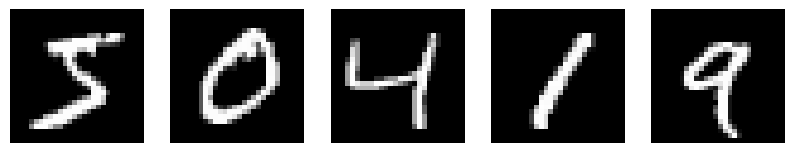

In [33]:
fig, axes = plt.subplots(1, 5, figsize=(10, 2))  
for i in range(5):
    axes[i].imshow(train_images[i].reshape(28, 28), cmap="gray")  # Reshape the 28x28 image and display it
    axes[i].axis('off')  # Hide the axes
plt.show()

In [34]:
num_images, height, width = train_images.shape
num_classes = len(np.unique(train_labels))
num_images, num_classes

(60000, 10)

In [35]:
# reshape input layer - single dimension
X_train = train_images.reshape(-1, 28,28, 1)
X_test = test_images.reshape(-1, 28,28, 1)
print(X_train.shape, X_test.shape)

# # convert to float32 type
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')

# scale pixel range to 0-1 
X_train = X_train / 255.
X_test = X_test / 255.

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [41]:
# one-hot encode class labels
encoder = OneHotEncoder()

y_train = encoder.fit_transform(train_labels.reshape(-1, 1))
y_test = encoder.fit_transform(test_labels.reshape(-1, 1))

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# model = CNN()